Задание 1
1). h(x)=+1, x >= a

Точка поломки: k = 2

Размерность Вапника-Черенкова: d_VC(h) = k - 1 = 1

Функция роста: m_H(N) = N + 1

2). h(x)=+1, a>=x>=b

Точка поломки: k = 3

Размерность Вапника-Черенкова: d_VC(h) = k - 1 = 2

Функция роста: m_H(N) = 1 + N / 2 + N^2 / 2

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines

In [48]:
data_set = pd.read_csv('blobs2.csv')
for i in range(len(data_set)):
    if data_set['label'][i] == 0:
        data_set['label'][i] = -1
data_eval = data_set[900:]
data_set = data_set[:900]
X = data_set['x']
Y = data_set['y']
label = data_set['label']

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Задание 2

In [49]:
def E_in(h, W, X, Y, label):
    return (len(X[h(W, X, Y, label) != label]) + 0.1 - 0.1) / len(X)
 
    
def h(W, X, Y, label):
    res = []
    for i in range(len(label)):
        if W[0] + W[1] * X[i] + W[2] * Y[i] >= 0:
            res.append(1)
        else:
            res.append(-1)
    return np.array(res)


def h_for_single_vector(W, x, y, label):
    return 1 if W[1] * x + W[2] * y + W[0] > 0 else -1

In [50]:
best_w = np.array([1, 1, 1])
cur_error = E_in(h, best_w, X, Y, label)
w = np.array([1, 1, 1])
j = 0
while j < 1000:
    j += 1
    for i in range(len(label)):
        if h_for_single_vector(w, X[i], Y[i], label[i]) != label[i]:
            w = w + np.array([1, label[i] * X[i], label[i] * Y[i]])
            error = E_in(h, w, X, Y, label)
            if error < cur_error:
                best_w = w
                cur_error = error
            break

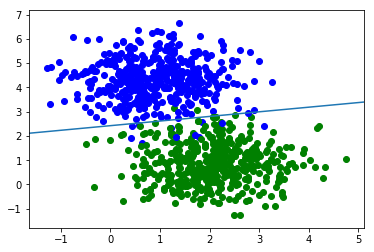

In [51]:
"""Функция newline взята с http://qaru.site/questions/626491/how-to-draw-a-line-with-matplotlib"""
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l


fig = plt.figure()
for i in range(len(label)):
    cl = h_for_single_vector(best_w, X[i], Y[i], label[i])
    if label[i] == -1:
        plt.scatter(X[i], Y[i], c='b')
    elif label[i] == 1:
        plt.scatter(X[i], Y[i], c='g')
p1 = []
p2 = []
p1.append(0)
p1.append((-1) * best_w[0] / best_w[2])
p2.append(1)
p2.append((-1) * (best_w[1] / best_w[2] + best_w[0] / best_w[2]))
newline(p1, p2)
plt.show()

In [52]:
X_eval = data_eval['x']
Y_eval = data_eval['y']
label_eval = data_eval['label']
tp = 0
fp = 0
for x, y, label in zip(X_eval, Y_eval, label_eval):
    eval_cl = h_for_single_vector(best_w, x, y, label)
    if eval_cl == label and label == 1:
        tp += 1
    if eval_cl == label and label == -1:
        fp += 1
accuracy = (tp + fp) / len(label_eval)
print("Accuracy: ", accuracy)

Accuracy:  0.98
